# 04.- INVESTIGATION

At this point, we need to generate the specific DataFrames to be plotted.

To do this, let's cook a few recipes!

___
### IMPORTS

In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

sns.set(color_codes = True)

In [2]:
from funcs_data import nameof, recipe, recipe_values

In [3]:
# This cell only needs to be executed to update funcs_driver
# and funcs_scrapping after them have been imported

# %run funcs_data
# %run funcs_driver.py
# %run funcs_scrapping.py

In [4]:
foods = pd.read_csv('./data/foods_refined.csv', index_col='Unnamed: 0')
foods.head()

,foodname_ESP,foodname_ENG,energy,fats,prot,water,fiber,carbs,m_unsat_fats,p_unsat_fats,...,potassium,magnesium,sodium,phosphorus,iodide,selenium,zinc,unsat_fats,salt,group
0,aceite de algodón,cotton oil,888.0,100.0,0.0,0.0,0.0,0.0,17.80,51.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.70,0.0,fats_oils
1,aceite de cacahuete,peanut oil,887.0,99.9,0.0,0.1,0.0,0.0,47.80,28.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.30,0.0,fats_oils
2,aceite de coco,coconut oil,888.0,100.0,0.0,0.0,0.0,0.0,4.96,0.77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.73,0.0,fats_oils
3,aceite de colza,rape oil,888.0,100.0,0.0,0.0,0.0,0.0,65.30,28.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.31,0.0,fats_oils
4,aceite de germen de trigo,wheat germ oil,887.0,99.9,0.0,0.1,0.0,0.0,15.10,61.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.80,0.0,fats_oils


In [5]:
nutritional_facts = foods.columns[2:-1]
nutritional_facts

Index(['energy', 'fats', 'prot', 'water', 'fiber', 'carbs', 'm_unsat_fats',
       'p_unsat_fats', 'sat_fats', 'palm_acid', 'chol', 'A', 'D', 'E', 'B9',
       'B3', 'B2', 'B1', 'B12', 'B6', 'C', 'calcium', 'iron', 'potassium',
       'magnesium', 'sodium', 'phosphorus', 'iodide', 'selenium', 'zinc',
       'unsat_fats', 'salt'],
      dtype='object')

In [6]:
with open('./data/recipes', 'rb') as f:
    salmorejo = pickle.load(f)
    tostada = pickle.load(f)
    porridge = pickle.load(f)

In [7]:
salmorejo = pd.Series(data=salmorejo, index=nutritional_facts)
tostada = pd.Series(data=tostada, index=nutritional_facts)
porridge = pd.Series(data=porridge, index=nutritional_facts)

In [8]:
tostada

energy           601.7000
fats              17.9800
prot              17.1900
water            102.0800
fiber              7.7000
carbs             91.0500
m_unsat_fats      12.2340
p_unsat_fats       1.7870
sat_fats           2.8335
palm_acid          0.1500
chol               0.0000
A                113.4350
D                  0.0000
E                  5.4360
B9                68.4000
B3                 5.1100
B2                 0.1500
B1                 0.2540
B12                0.0000
B6                 0.3280
C                 19.0000
calcium          124.8000
iron               3.6800
potassium        334.0000
magnesium         69.0000
sodium          1290.0000
phosphorus       209.0000
iodide            20.2100
selenium          50.5500
zinc               1.4300
unsat_fats        14.0210
salt            3225.0000
dtype: float64

In [9]:
salmorejo

energy           1703.150000
fats              113.399500
prot               37.385625
water            1066.780000
fiber              18.180000
carbs             132.840000
m_unsat_fats       82.733500
p_unsat_fats       10.397000
sat_fats           17.893500
palm_acid          11.150000
chol              221.600000
A                 967.850000
D                   1.025000
E                  27.945000
B9                370.020000
B3                 12.679000
B2                  0.733000
B1                  0.972500
B12                 0.750000
B6                  1.298000
C                 192.100000
calcium           266.170000
iron                9.825000
potassium        2779.300000
magnesium         169.965000
sodium           5375.500000
phosphorus        547.550000
iodide             65.415000
selenium           81.485000
zinc                4.405000
unsat_fats         93.130500
salt            13438.750000
dtype: float64

___
### COUNTPLOT

In [10]:
# Setting colors
base_c = 'grey'
main_c = '#288890'
accent_c = '#ff464f'

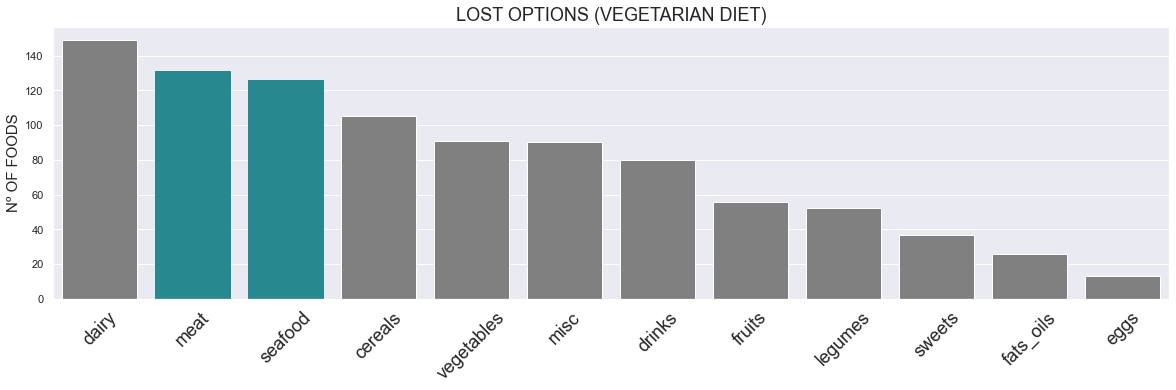

In [11]:
# Lost options (vegetarian)
plt.figure(figsize=(20,5))

ax = sns.countplot(x=foods['group'],
                    order = foods['group'].value_counts().index,
                    color='grey')

ax.set_title('LOST OPTIONS (VEGETARIAN DIET)', fontsize = 18)
ax.set_xlabel('')
ax.set_ylabel('Nº OF FOODS', fontsize = 15)

highlight = [1, 2]
for bar in highlight: ax.patches[bar].set_color(main_c)
plt.xticks(rotation=45, fontsize = 18);

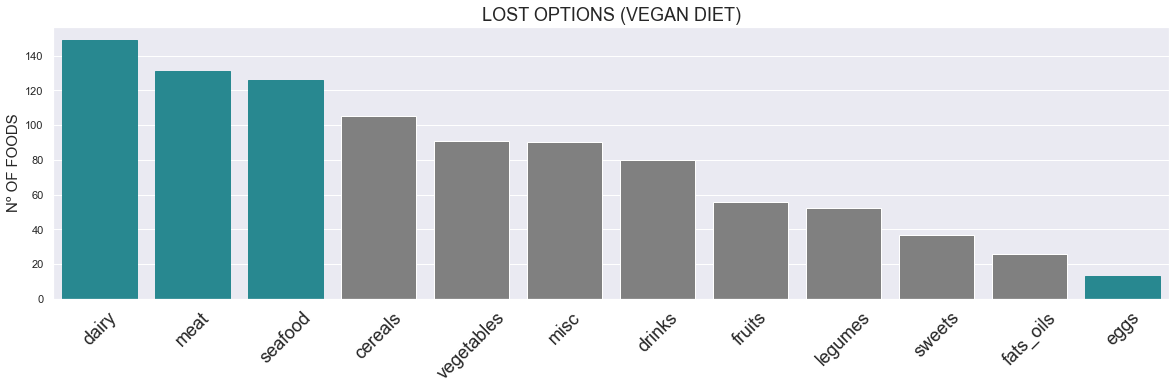

In [12]:
# Lost options (vegan)
plt.figure(figsize=(20,5))

ax = sns.countplot(x=foods['group'],
                    order = foods['group'].value_counts().index,
                    color='grey')

ax.set_title('LOST OPTIONS (VEGAN DIET)', fontsize = 18)
ax.set_xlabel('')
ax.set_ylabel('Nº OF FOODS', fontsize = 15)

highlight = [0, 1, 2, 11]
for bar in highlight: ax.patches[bar].set_color(main_c)
plt.xticks(rotation=45, fontsize = 18);

___
### BARPLOTS

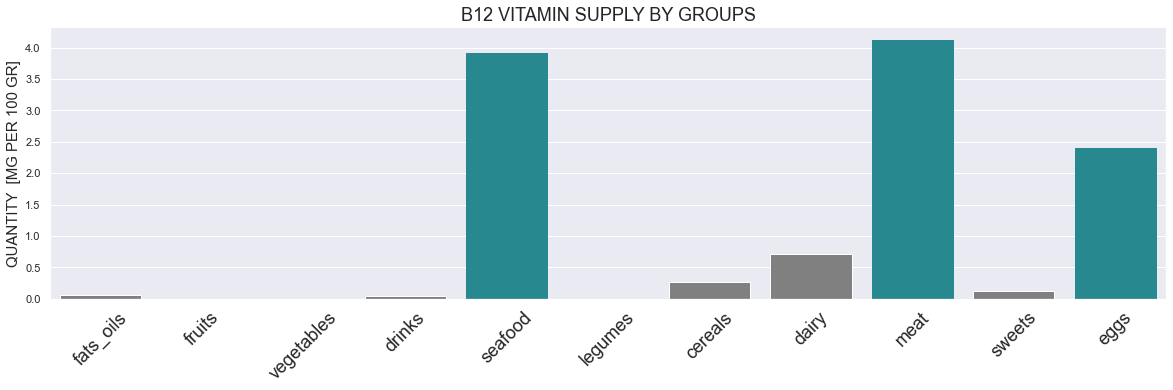

In [13]:
# B12 vitamin supply by groups
plt.figure(figsize=(20,5))

ax = sns.barplot(x=foods.group[foods.group != 'misc'],
                y=foods['B12'],
                data=foods.groupby('group').mean(),
                ci=None,
                color=base_c)
           
ax.set_title('B12 VITAMIN SUPPLY BY GROUPS', fontsize = 18)
ax.set_xlabel('')
ax.set_ylabel('QUANTITY  [MG PER 100 GR]', fontsize = 15)

highlight = [4, 8, 10]
for bar in highlight: ax.patches[bar].set_color(main_c)
plt.xticks(rotation=45, fontsize = 18);

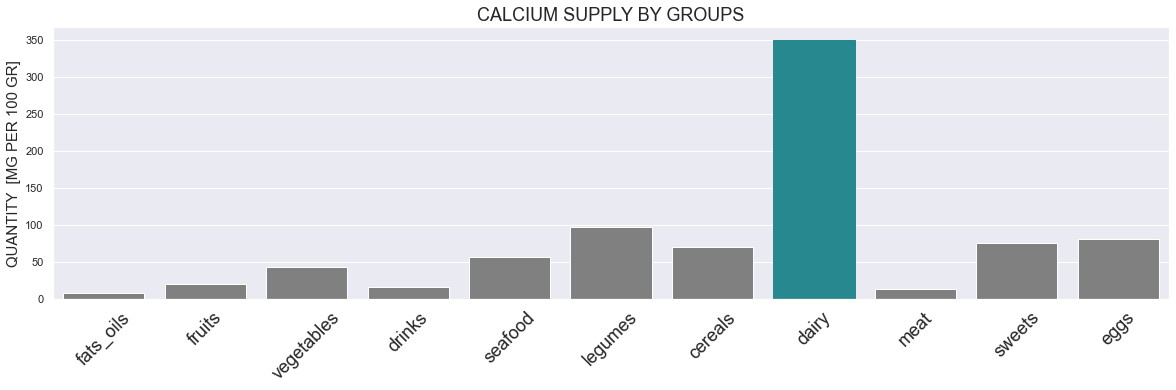

In [14]:
# Calcium supply by groups
plt.figure(figsize=(20,5))

ax = sns.barplot(x=foods.group[foods.group != 'misc'],
                y=foods['calcium'],
                data=foods.groupby('group').mean(),
                ci=None,
                color=base_c)
           
ax.set_title('CALCIUM SUPPLY BY GROUPS', fontsize = 18)
ax.set_xlabel('')
ax.set_ylabel('QUANTITY  [MG PER 100 GR]', fontsize = 15)

highlight = [7]
for bar in highlight: ax.patches[bar].set_color(main_c)
plt.xticks(rotation=45, fontsize = 18);

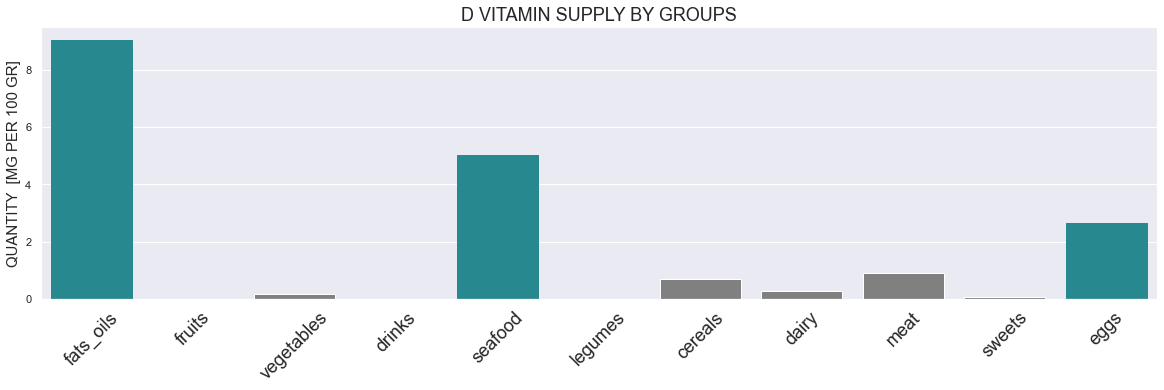

In [15]:
# D vitamin supply by groups
plt.figure(figsize=(20,5))

ax = sns.barplot(x=foods.group[foods.group != 'misc'],
                y=foods['D'],
                data=foods.groupby('group').mean(),
                ci=None,
                color=base_c);
           
ax.set_title('D VITAMIN SUPPLY BY GROUPS', fontsize = 18)
ax.set_xlabel('')
ax.set_ylabel('QUANTITY  [MG PER 100 GR]', fontsize = 15)

highlight = [0, 4, 10]
for bar in highlight: ax.patches[bar].set_color(main_c)
plt.xticks(rotation=45, fontsize = 18);

In [16]:
tostada = tostada.rename('bread')
porridge = porridge.rename('porridge')
carbs_comp = pd.concat([tostada, porridge], axis=1).T

In [17]:
carbs_comp

,energy,fats,prot,water,fiber,carbs,m_unsat_fats,p_unsat_fats,sat_fats,palm_acid,...,iron,potassium,magnesium,sodium,phosphorus,iodide,selenium,zinc,unsat_fats,salt
bread,601.70,17.98,17.190,102.08,7.7,91.05,12.234,1.787,2.8335,0.15,...,3.68,334.0,69.00,1290.00,209.00,20.21,50.550,1.43,14.021,3225.000
porridge,378.75,12.95,16.125,221.85,5.3,48.74,3.850,1.575,6.3500,2.50,...,2.62,609.7,117.75,122.15,492.35,25.75,6.025,2.95,5.425,305.375


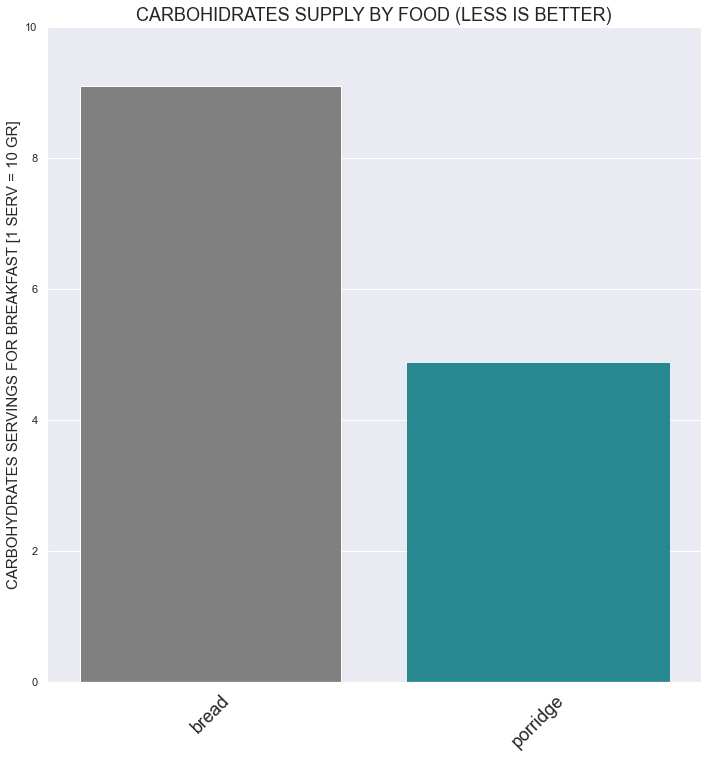

In [18]:
# Carbs for breakfast
plt.figure(figsize=(10, 10))

#df = pd.DataFrame(tostada: 'tostada', porridge: 'porridge')

ax = sns.barplot(x=carbs_comp.index,
                y= carbs_comp['carbs'] / 10,
                data=carbs_comp,
                ci=None,
                color=base_c)

ax.set_title('CARBOHIDRATES SUPPLY BY FOOD (LESS IS BETTER)', fontsize = 18)
ax.set_xlabel('')
ax.set_ylabel('CARBOHYDRATES SERVINGS FOR BREAKFAST [1 SERV = 10 GR]', fontsize = 15)
ax.set_ylim(0, 10)

plt.tight_layout()

highlight = [1]
for bar in highlight: ax.patches[bar].set_color(main_c)
plt.xticks(rotation=45, fontsize = 18);

___
### SCATTERPLOTS

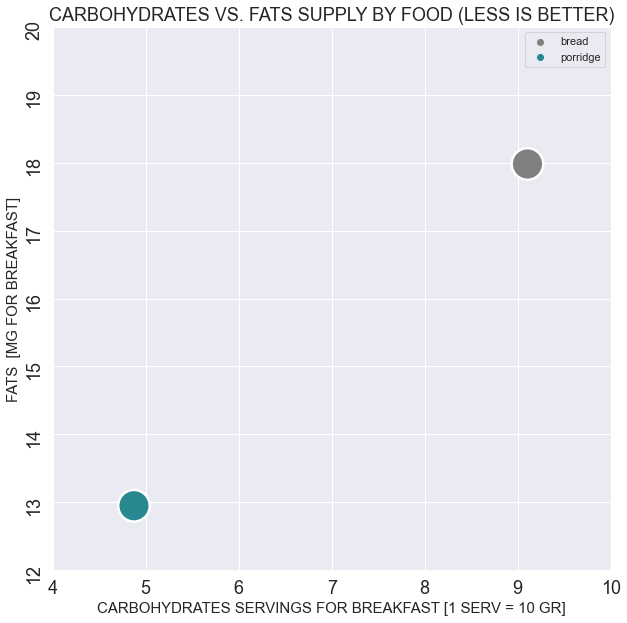

In [19]:
# Carbs vs. fats for breakfast
plt.figure(figsize=(10, 10))

colors = [base_c, main_c]
sns.set_palette(sns.color_palette(colors))

ax = sns.scatterplot(x=carbs_comp['carbs'] / 10,
            y= carbs_comp['fats'],
            data=carbs_comp,
            s=1000,
            hue = carbs_comp.index,
            color=base_c);

ax.set_title('CARBOHYDRATES VS. FATS SUPPLY BY FOOD (LESS IS BETTER)', fontsize = 18)
ax.set_xlabel('CARBOHYDRATES SERVINGS FOR BREAKFAST [1 SERV = 10 GR]', fontsize = 15)
ax.set_ylabel('FATS  [MG FOR BREAKFAST]', fontsize = 15)
ax.set_xlim(4, 10)
ax.set_ylim(12, 20)

highlight = []
for bar in highlight: ax.patches[bar].set_color(main_c)
plt.xticks(rotation=0, fontsize = 18)
plt.yticks(rotation=90, fontsize = 18);

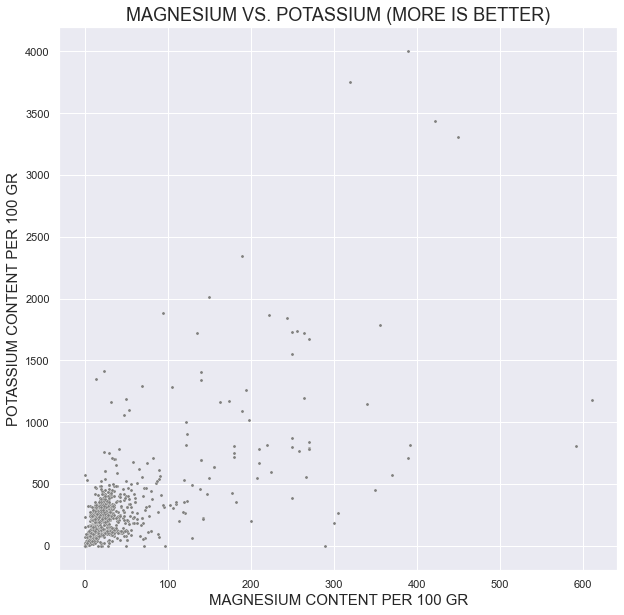

In [20]:
# Magnesium vs. potassium
plt.figure(figsize=(10, 10))

colors = [base_c, main_c]
sns.set_palette(sns.color_palette(colors))

ax = sns.scatterplot(x=foods['magnesium'],
            y= foods['potassium'],
            data=foods,
            s=10,
            #hue = foods['group'],
            color=base_c);

ax.set_title('MAGNESIUM VS. POTASSIUM (MORE IS BETTER)', fontsize = 18)
ax.set_xlabel('MAGNESIUM CONTENT PER 100 GR', fontsize = 15)
ax.set_ylabel('POTASSIUM CONTENT PER 100 GR', fontsize = 15)

plt.show()

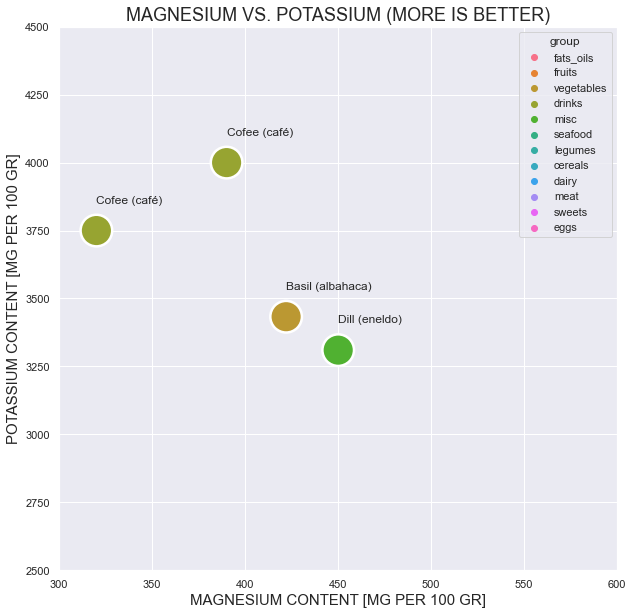

In [33]:
# Magnesium vs. potassium
plt.figure(figsize=(10, 10))
plt.annotate('Basil (albahaca)', (422, 3533))
plt.annotate('Dill (eneldo)', (450, 3410))
plt.annotate('Cofee (café)', (390, 4100))
plt.annotate('Cofee (café)', (320, 3850))

colors = [base_c, main_c]
sns.set_palette(sns.color_palette(colors))

ax = sns.scatterplot(x=foods['magnesium'],
            y= foods['potassium'],
            data=foods,
            s=1000,
            hue = foods['group'],
            color=base_c);

ax.set_title('MAGNESIUM VS. POTASSIUM (MORE IS BETTER)', fontsize = 18)
ax.set_xlabel('MAGNESIUM CONTENT [MG PER 100 GR]', fontsize = 15)
ax.set_ylabel('POTASSIUM CONTENT [MG PER 100 GR]', fontsize = 15)
ax.set_xlim(300, 600)
ax.set_ylim(2500, 4500)

plt.show()

In [36]:
magnesium_top = foods['magnesium'] > 350
potassium_top = foods['potassium'] > 3100

foods[['foodname_ENG', 'foodname_ESP', 'magnesium', 'potassium']][magnesium_top | potassium_top]

,foodname_ENG,foodname_ESP,magnesium,potassium
31,basil,albahaca,422.0,3433.0
151,"coffee, powder","café, en polvo, sin reconstituir",320.0,3750.0
152,"soluble coffee, powder","café, en polvo, soluble",390.0,4000.0
266,cumin,comino,356.0,1788.0
316,"dill, dried","eneldo, seco",450.0,3310.0
607,tahini,pasta de sésamo,370.0,570.0
663,pumpkin seeds,pipa de calabaza,592.0,809.0
664,sunflower seeds,pipa de girasol,390.0,710.0
820,"wheat, bran",salvado de trigo,611.0,1182.0
830,"flax, seeds",semilla de lino,392.0,813.0


___
### HEATMAP

In [23]:
foods.columns

Index(['foodname_ESP', 'foodname_ENG', 'energy', 'fats', 'prot', 'water',
       'fiber', 'carbs', 'm_unsat_fats', 'p_unsat_fats', 'sat_fats',
       'palm_acid', 'chol', 'A', 'D', 'E', 'B9', 'B3', 'B2', 'B1', 'B12', 'B6',
       'C', 'calcium', 'iron', 'potassium', 'magnesium', 'sodium',
       'phosphorus', 'iodide', 'selenium', 'zinc', 'unsat_fats', 'salt',
       'group'],
      dtype='object')

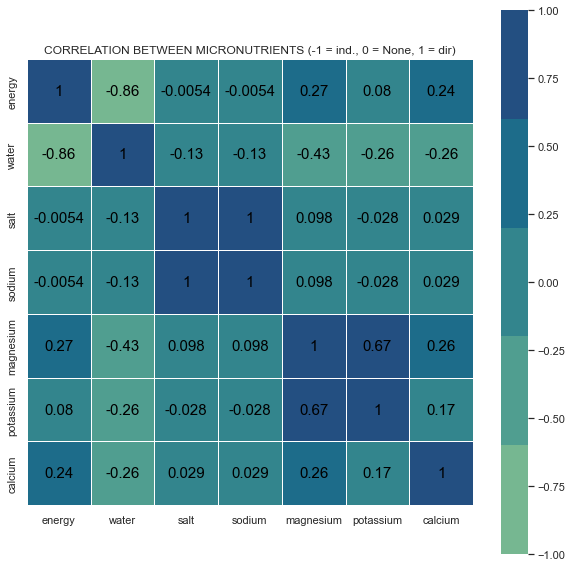

In [668]:
# Carbs vs. fats for breakfast
plt.figure(figsize=(10, 10))

colors = [base_c, main_c, accent_c]
sns.set_palette(sns.color_palette(colors))

ax = sns.heatmap(foods[['energy', 'water', 'salt', 'sodium', 'magnesium',
            'potassium', 'calcium']].corr(),
            annot=True,
            annot_kws={'size': 15, 'color': 'black'},
            vmin=-1,
            vmax=1,
            #cmap = 'crest',
            cmap = sns.color_palette('crest', n_colors=5),
            square=True,
            linewidths=.5);

ax.set_title('CORRELATION BETWEEN MICRONUTRIENTS (-1 = ind., 0 = None, 1 = dir)', fontsize = 12);